This is a Sunny port of SpinW tutorial 6, originally authored by Bjorn Fak and Sandor Toth. The goal is to calculate the spin wave spectrum of Ferromagnetic Kagome lattice.

Load Packages

In [1]:
using Sunny, GLMakie, CairoMakie 

Set up the lattice, the position of magnetic atoms, the symmetry inequivalent postions and the spin. Space group is P-3 or 147. 

In [3]:
a=6.0
b=6.0
c=8.0
units=Units(:meV)
latvecs = lattice_vectors(a, b, c, 90, 90, 120) 
positions=[[1/2, 0, 0]]
types=["Cu1"]
Cu = Crystal(latvecs,positions,147;types)
GLMakie.activate!()
view_crystal(Cu)

┌ Warning: Found 102 bonds using max_dist of 17.92561898622866
└ @ PlottingExt /Users/bhushanthipe/.julia/packages/Sunny/lN59K/ext/PlottingExt.jl:310


Create a system with a lattice size (2,2,1) since the propagation vector is (1/2,1/2,0) The spin is 1.

In [4]:
sys=System(Cu, (2,2,1),[SpinInfo(1,S=1,g=2)], :dipole, seed=0)

System [Dipole mode]
Lattice (2×2×1)×3
Energy per site 0


Set up the exchanges to build the hamiltonian. Randomize the spins and minimize the energy to obtain the ground state. 

In [5]:
J1=-1.0
J2=0.1
J3a=0.00
J3b=0.17
J3c=0.0

set_exchange!(sys,J1,Bond(2, 3, [0, 0, 0]))
set_exchange!(sys,J2,Bond(2, 1, [0, 0, 0]))
set_exchange!(sys,J3a,Bond(2, 2, [1, 0, 0]))
set_exchange!(sys,J3b,Bond(1, 1,[1, 0, 0]))
set_exchange!(sys,J3c,Bond(1, 1, [0, 1, 0]))
randomize_spins!(sys)
minimize_energy!(sys)
plot_spins(sys)

Create the LSWT object and set up a path. Obtain the dispersion and intensity bands.

In [6]:
swt=SpinWaveTheory(sys;measure=ssf_perp(sys))
q_points = [[-1/2,0,0], [0,0,0], [1/2,1/2,0]]
density = 400
path = q_space_path(Cu, q_points, density);
res = intensities_bands(swt, path)


Sunny.BandIntensities{Float64} (12×400 elements)

Plot the dispersion and intensity.

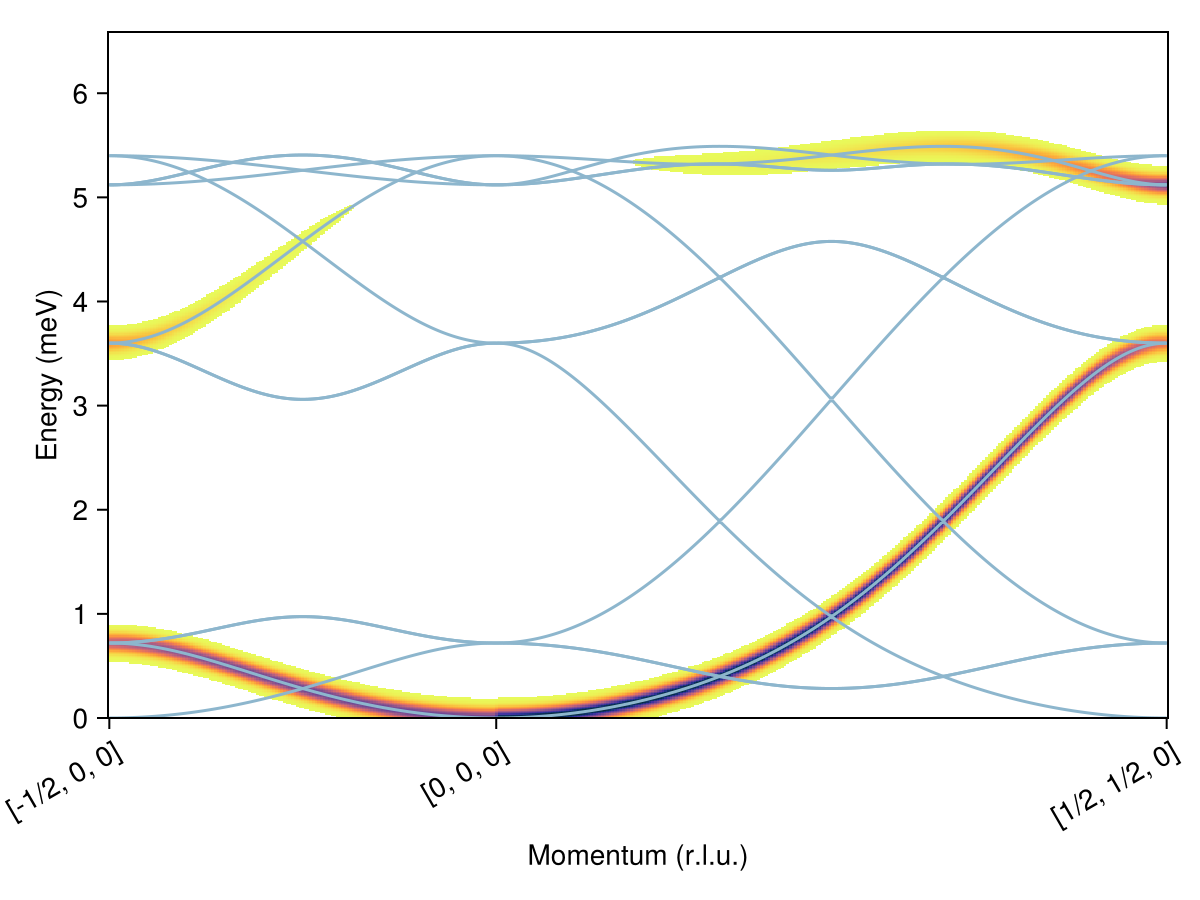

In [7]:

CairoMakie.activate!()
Sunny.BandIntensities{Float64}
plot_intensities(res; units)

Plot the powder averaged results

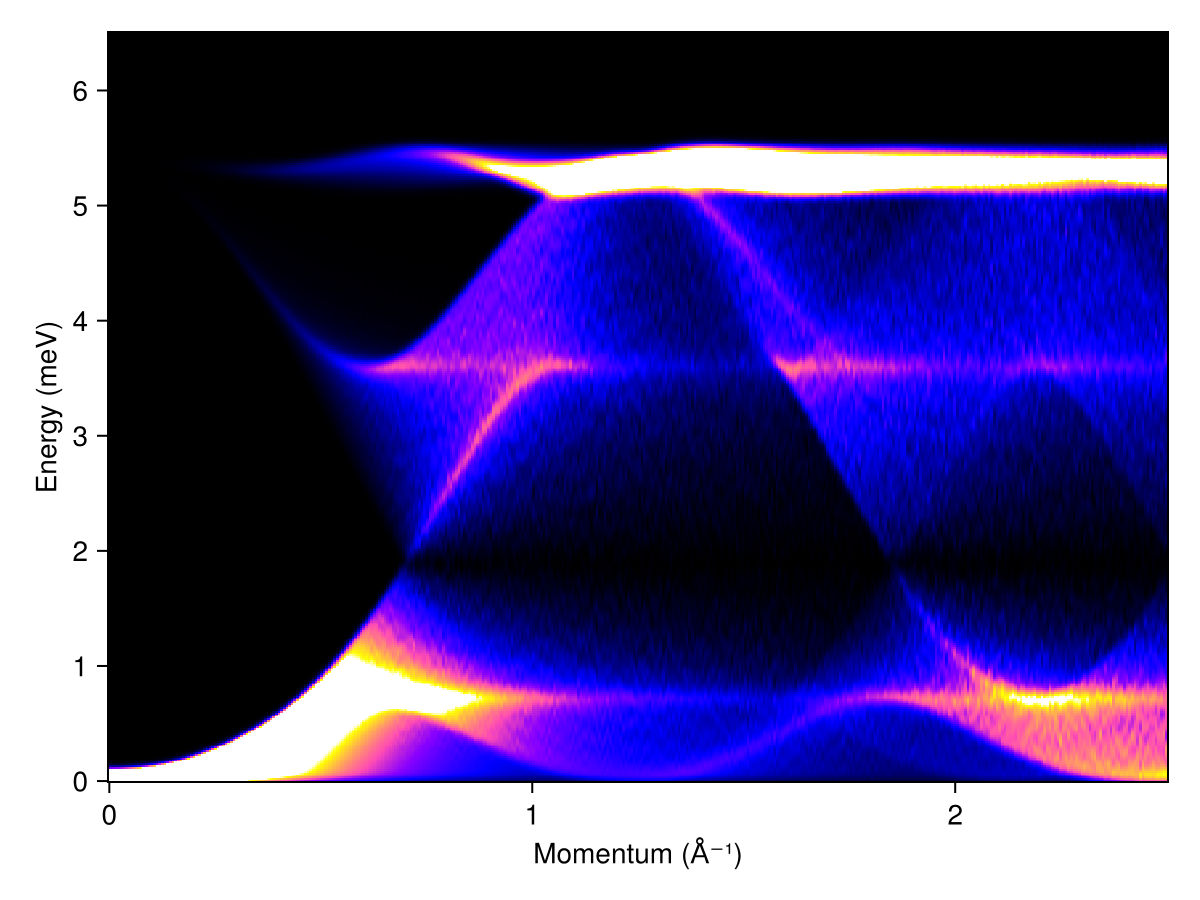

In [8]:
radii = range(0, 2.5, 400) # (1/Å)
energies = range(0, 6.5, 400)
kernel = gaussian(fwhm=0.1)
res = powder_average(Cu, radii, 1600) do q_points
    intensities(swt, q_points; energies, kernel)
end
plot_intensities(res; units, colorrange=(0,5))